# Ant-Colony-Optimization Problem

This Jupyter Notebook deals with Ant-Colony-Optimization. All information is taken from Daniel Merkle's and Martin Middendorf's Chapter 14 on Swarm Intelligence in Search Methodologies. Introductory Tutorials in Optimization and Decision Support Techniques by Edmund K. Burke and Graham Kendall.

Ant-Colony Optimization is one of two main areas of Swarm Intelligence. It is used to solve optimization and search problems. The idea is that ant colonies find the shortest way form their nest to the food source with the help of pheromones. Experiments have shown that if you connect the nest with two different branches to a food source - one way is longer than the other one, ants will quickly find out which way is the shortest one. The result is an ant trail.

How exactly does it work? At the beginning both branches are taken with the same probability. After a while the pheromone concentration will be higher at the shorter branch since the ants are back at the nest way faster if they have taken the short road. The pheromone concentration gets higher more easily and since ants are taking the road with a higher pheromone concentration, eventually all ants take the short road

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Initialization
Importing .txt files and saving them as arrays.

In [2]:
def initialize(filepath): 
    with open(filepath, 'r') as t:
        distance_matrix = []
        for line in t.readlines():
            y = [int(value) for value in line.split()]
            distance_matrix.append(y)
        
        t.close()
        distance_matrix = np.array(distance_matrix)
    
    return distance_matrix

## 2. Solution Construction

In [114]:
def solution_construction(distance_matrix, pheromone_matrix, number_ants,alpha,beta):
    ant_number = 0
    len_distance_matrix = len(distance_matrix)
    range_distance_matrix = np.arange(len(distance_matrix))
    
    # creating a solution matrix corresponding to the size of the distance_matrix
    solution_matrix = np.zeros(shape=(number_ants, len_distance_matrix), dtype='int')
    
    # do for each ant
    while ant_number < number_ants:
        #print('solution_construction')
        
        # initialize selection_set, append a placeholder '1' for each city available           
        #selection_set = np.array([[1] for i in range_distance_matrix], dtype='int')
        selection_set = np.ones(len(distance_matrix))
        
        
        # choose a random starting city, save it in the solution matrix and set it to '0' in selection_set
        start = (np.random.random_integers(0, len_distance_matrix-1))
        solution_matrix[ant_number, 0] = start
        selection_set[start] = 0
        
        # iterating through all cities until no one is left "one ant"
        #print("start: 1. for x")
        for x in np.arange(len_distance_matrix-1):
            probability = np.zeros((len_distance_matrix))
                
            # create probability matrix of size of distance_matrix    
            #print("start: 2. for i")
            new_array = np.where(selection_set != 0)[0]
            for i in new_array:
                variable = solution_matrix[ant_number, x]

                t = (pheromone_matrix[variable][i])**alpha
                n = (1/(distance_matrix[variable][i]))**beta

                pheromones_city_before = pheromone_matrix[solution_matrix[ant_number][x]]
                distances_city_before = distance_matrix[solution_matrix[ant_number][x]]
                
                pheromones_city_before = pheromones_city_before[selection_set!=0] 
                distances_city_before = distances_city_before[selection_set!=0]

                total_sum = np.sum((pheromones_city_before)**alpha * (1/distances_city_before)**beta)

                probability[i] = (t*n)/total_sum

            #print("end: 2. for i")
            #boundaries = []
            boundaries = np.zeros((len_distance_matrix))
            #boundaries.append(0)
            boundaries[0] = probability[0]
 
            # calculation of boundaries for roulette-wheel-like selection of next city
            for i in np.arange(1, len_distance_matrix):
                #boundaries.append(0)
                boundaries[i] = probability[i]+boundaries[i-1]
            # selection of the next city
            rand_mate = np.random.uniform(0,1)
            for m in np.arange(len_distance_matrix):
                if boundaries[m] >= rand_mate:
                    city = m
                    break
            solution_matrix[ant_number, x+1] = city
            selection_set[m] = 0
        #print("end: 1. for x")    
        ant_number += 1
        #print(solution_matrix)
    return solution_matrix

In [121]:
def solution_construction_both1(distance_matrix, pheromone_matrix, number_ants):
    ant_number = 0
    len_distance_matrix = len(distance_matrix)
    range_distance_matrix = np.arange(len(distance_matrix))
    
    # creating a solution matrix corresponding to the size of the distance_matrix
    solution_matrix = np.zeros(shape=(number_ants, len_distance_matrix), dtype='int')
    
    # do for each ant
    while ant_number < number_ants:
        #print('solution_construction')
        
        # initialize selection_set, append a placeholder '1' for each city available           
        #selection_set = np.array([[1] for i in range_distance_matrix], dtype='int')
        selection_set = np.ones(len(distance_matrix))
        
        
        # choose a random starting city, save it in the solution matrix and set it to '0' in selection_set
        start = (np.random.random_integers(0, len_distance_matrix-1))
        solution_matrix[ant_number, 0] = start
        selection_set[start] = 0
        
        # iterating through all cities until no one is left "one ant"
        #print("start: 1. for x")
        for x in np.arange(len_distance_matrix-1):
            probability = np.zeros((len_distance_matrix))
                
            # create probability matrix of size of distance_matrix    
            #print("start: 2. for i")
            new_array = np.where(selection_set != 0)[0]
            for i in new_array:
                variable = solution_matrix[ant_number, x]

                t = (pheromone_matrix[variable][i])
                n = (1/(distance_matrix[variable][i]))

                pheromones_city_before = pheromone_matrix[solution_matrix[ant_number][x]]
                distances_city_before = distance_matrix[solution_matrix[ant_number][x]]
                
                pheromones_city_before = pheromones_city_before[selection_set!=0] 
                distances_city_before = distances_city_before[selection_set!=0]

                total_sum = np.sum((pheromones_city_before) * (1/distances_city_before))

                probability[i] = (t*n)/total_sum

            #print("end: 2. for i")
            #boundaries = []
            boundaries = np.zeros((len_distance_matrix))
            #boundaries.append(0)
            boundaries[0] = probability[0]
 
            # calculation of boundaries for roulette-wheel-like selection of next city
            for i in np.arange(1, len_distance_matrix):
                #boundaries.append(0)
                boundaries[i] = probability[i]+boundaries[i-1]
            # selection of the next city
            rand_mate = np.random.uniform(0,1)
            for m in np.arange(len_distance_matrix-1):
                if boundaries[m] >= rand_mate:
                    city = m
                    break
            solution_matrix[ant_number, x+1] = city
            selection_set[m] = 0
        #print("end: 1. for x")    
        ant_number += 1
        #print(solution_matrix)
    return solution_matrix

In [181]:
def solution_construction_withoutbeta(distance_matrix, pheromone_matrix, number_ants):
    
    ant_number = 0
    len_distance_matrix = len(distance_matrix)
    range_distance_matrix = np.arange(len(distance_matrix))
    
    # creating a solution matrix corresponding to the size of the distance_matrix
    solution_matrix = np.zeros(shape=(number_ants, len_distance_matrix), dtype='int')
    
    # do for each ant
    while ant_number < number_ants:
        # initialize selection_set, append a placeholder '1' for each city available           
        selection_set = np.ones(len(distance_matrix))
        
        # choose a random starting city, save it in the solution matrix and set it to '0' in selection_set
        start = (np.random.random_integers(0, len_distance_matrix-1))
        solution_matrix[ant_number, 0] = start
        selection_set[start] = 0
        
        # iterating through all cities until no one is left "one ant"
        for x in np.arange(len_distance_matrix-1):
            probability = np.zeros((len_distance_matrix))
                
            # create probability matrix of size of distance_matrix    
            cities_left = np.where(selection_set != 0)[0]
            for i in cities_left:
                city_before = solution_matrix[ant_number, x]

                t = (pheromone_matrix[city_before][i])

                pheromones_city_before = pheromone_matrix[city_before]
                pheromones_city_before = pheromones_city_before[selection_set!=0] 

                total_sum = np.sum((pheromones_city_before))

                probability[i] = (t)/total_sum

            boundaries = np.zeros((len_distance_matrix))
            boundaries[0] = probability[0]
 
            # calculation of boundaries for roulette-wheel-like selection of next city
            for i in np.arange(1, len_distance_matrix):
                boundaries[i] = probability[i]+boundaries[i-1]
            
            # selection of the next city
            rand_mate = np.random.uniform(0,1)
            #print(boundaries)
            #print(rand_mate)
            for m in range(len_distance_matrix-1):
                if rand_mate == 1:
                    city = len_distance_matrix
                    break
                elif boundaries[m] > rand_mate:
                    city = m
                    break
            solution_matrix[ant_number, x+1] = city
            selection_set[m] = 0
        #print("end: 1. for x")    
        ant_number += 1
        #print(len(set(solution_matrix[0])))
        #print(solution_matrix)
    return solution_matrix

In [153]:
boundaries = np.zeros(5)
probability = [0.2,0.2,0.1,0.3,0.2]
boundaries[0] = probability[0]
for j in range(1000):           
    for i in np.arange(1, 5):
        boundaries[i] = probability[i]+boundaries[i-1]

        # selection of the next city
        rand_mate = np.random.uniform(0,1)
        for m in range(5-1):
            if rand_mate == 1:
                #print(m)
                #print(rand_mate)
                #print(boundaries[m])
                city = 5
                break
            elif boundaries[m] > rand_mate:
                #print(m)
                #print(rand_mate)
                #print(boundaries[m])
                city = m
                break
print(boundaries)           

[ 0.2  0.4  0.5  0.8  1. ]


## 3. Evaporation

In [152]:
def evaporate(pheromone_matrix,evaporator):
    pheromone_matrix = pheromone_matrix * evaporator

    return pheromone_matrix

## 4. Intensification

solution_matrix will be a list of lists which each holding the numbers of the cities in the order that  each of the ants visited them


In [5]:
def get_best_solution(distance_matrix, solution_matrix):
    shortest_distance = 10000000000
    for i in solution_matrix:
        distance = 0
       
       
        for j in range(len(i)):
            y=i[j]
            if j < len(i)-1: 
                distance = distance + distance_matrix[y][i[j+1]]
            else:
                distance= distance + distance_matrix[i[j]][i[0]]
         
        
        if distance < shortest_distance:
            shortest_distance = distance
            best_solution = i
            #print(best_solution)
    return best_solution, shortest_distance

In [6]:
array2=[[1, 1, 1],[1, 1, 1],[1, 1, 1]]
array3=[[1, 2, 0],[0, 2, 1]]
array0=[[0, 4, 1],[1, 0, 5],[4, 1, 0]]

def intensification(distance_matrix, pheromone_matrix, solution_matrix,intensifier):
      
    best_solution, shortest_distance = get_best_solution(distance_matrix, solution_matrix)
   
    for k in range(len(best_solution)):  
        x = best_solution[k]
        if k < len(best_solution)-1: 
            pheromone_matrix[x][best_solution[k+1]]= pheromone_matrix[x][best_solution[k+1]]*intensifier
        else:
            pheromone_matrix[best_solution[k]][0]= pheromone_matrix[best_solution[k]][0]*intensifier
   
    return pheromone_matrix
            
print(intensification(array0,array2,array3,1.05))

[[1, 1, 1.05], [1.05, 1, 1], [1, 1.05, 1]]


## Action

In [182]:
# Choose the city matrix: '01_tsp.txt', '02_tsp.txt', '03_tsp.txt'
filepath = '01_tsp.txt'
distance_matrix = initialize(filepath)

# Set up pheromone matrix with shape 150 x 150 and fixed values = 0.01
pheromone_matrix = np.full(distance_matrix.shape, 0.01)

# Set number of ants
number_ants = 3

# Set alpha and beta (test: alpha = 1, beta = 0 AND alpha = 1, beta = 0)
alpha = 1
beta = 0

intensifier = 1.10
evaporator = 0.1

%timeit
best_solution_list = []
# "Measure" convergence
converged = False
count = 0
totalCount = 0

while not converged: 
    # solution_paths store the order how each ant visited the cities (each row is one ant)
    #if alpha == 1 and beta == 1
    solution_matrix = solution_construction_withoutbeta(distance_matrix, pheromone_matrix, number_ants)
    print("solution_contruction done!")
    
    # Set up new pheromone matrix
    pheromone_matrix = evaporate(pheromone_matrix,evaporator)

    # Intensify good solutions and store them in a new pheromone matrix
    pheromone_matrix = intensification(distance_matrix, pheromone_matrix, solution_matrix,intensifier)
        
    # Convergence-Criterium:
    best_solution, shortest_distance = get_best_solution(distance_matrix, solution_matrix)
    best_solution_list.append(shortest_distance)
    if count == 10:
    # if best_solution did not change, the algorithm converged, otherwise we reset the count value
        if best_solution_first == shortest_distance:
            converged = True
        else:
            count = 0
    # store the first best_solution for convergence-comparison
    elif count == 0:
        best_solution_first = shortest_distance
        count += 1
    else:
    # increase count
        count += 1
    totalCount += 1
    print("totalCount",totalCount)
    print("best_solution",shortest_distance)
    print("best_solution_list",best_solution_list)
print("done!")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  app.launch_new_instance()


[ 0.00671141  0.01342282  0.02013423  0.02684564  0.03355705  0.04026846
  0.04697987  0.05369128  0.06040268  0.06711409  0.0738255   0.08053691
  0.08724832  0.09395973  0.10067114  0.10738255  0.11409396  0.12080537
  0.12751678  0.13422819  0.1409396   0.14765101  0.15436242  0.16107383
  0.16778523  0.17449664  0.18120805  0.18791946  0.19463087  0.20134228
  0.20805369  0.2147651   0.22147651  0.22818792  0.23489933  0.24161074
  0.24832215  0.25503356  0.26174497  0.26845638  0.27516779  0.28187919
  0.2885906   0.29530201  0.30201342  0.30872483  0.31543624  0.32214765
  0.32885906  0.33557047  0.34228188  0.34899329  0.3557047   0.36241611
  0.36912752  0.37583893  0.38255034  0.38926174  0.39597315  0.40268456
  0.40939597  0.41610738  0.42281879  0.4295302   0.43624161  0.44295302
  0.44966443  0.45637584  0.46308725  0.46979866  0.47651007  0.48322148
  0.48993289  0.4966443   0.5033557   0.51006711  0.51677852  0.52348993
  0.53020134  0.53691275  0.54362416  0.55033557  0

[ 0.00704225  0.01408451  0.02112676  0.02816901  0.03521127  0.04225352
  0.04929577  0.04929577  0.05633803  0.06338028  0.07042254  0.07746479
  0.08450704  0.0915493   0.09859155  0.1056338   0.11267606  0.11971831
  0.12676056  0.13380282  0.14084507  0.14084507  0.14788732  0.15492958
  0.15492958  0.16197183  0.16901408  0.17605634  0.18309859  0.19014085
  0.1971831   0.20422535  0.20422535  0.21126761  0.21830986  0.22535211
  0.23239437  0.23943662  0.24647887  0.25352113  0.26056338  0.26760563
  0.27464789  0.28169014  0.28873239  0.29577465  0.3028169   0.30985915
  0.31690141  0.32394366  0.33098592  0.33802817  0.34507042  0.35211268
  0.35915493  0.36619718  0.37323944  0.38028169  0.38732394  0.3943662
  0.40140845  0.4084507   0.41549296  0.42253521  0.42957746  0.43661972
  0.44366197  0.45070423  0.45070423  0.45774648  0.46478873  0.47183099
  0.47887324  0.48591549  0.49295775  0.5         0.50704225  0.51408451
  0.52112676  0.52816901  0.53521127  0.54225352  0.

0.8414320035558226
[ 0.00793651  0.01587302  0.02380952  0.03174603  0.03968254  0.04761905
  0.05555556  0.05555556  0.06349206  0.06349206  0.07142857  0.07936508
  0.08730159  0.08730159  0.0952381   0.1031746   0.11111111  0.11111111
  0.11904762  0.12698413  0.13492063  0.13492063  0.14285714  0.15079365
  0.15079365  0.15873016  0.16666667  0.17460317  0.18253968  0.19047619
  0.19047619  0.1984127   0.1984127   0.20634921  0.21428571  0.22222222
  0.23015873  0.23809524  0.24603175  0.25396825  0.26190476  0.26984127
  0.27777778  0.28571429  0.29365079  0.3015873   0.30952381  0.31746032
  0.32539683  0.33333333  0.34126984  0.34920635  0.35714286  0.36507937
  0.37301587  0.38095238  0.38095238  0.38888889  0.3968254   0.4047619
  0.41269841  0.41269841  0.42063492  0.42857143  0.43650794  0.44444444
  0.45238095  0.45238095  0.45238095  0.46031746  0.46825397  0.47619048
  0.48412698  0.49206349  0.5         0.50793651  0.51587302  0.51587302
  0.52380952  0.53174603  0.53968

[ 0.01041667  0.02083333  0.03125     0.03125     0.03125     0.04166667
  0.04166667  0.04166667  0.05208333  0.05208333  0.0625      0.07291667
  0.07291667  0.07291667  0.07291667  0.08333333  0.09375     0.09375
  0.10416667  0.11458333  0.125       0.125       0.13541667  0.14583333
  0.14583333  0.14583333  0.15625     0.16666667  0.16666667  0.17708333
  0.17708333  0.1875      0.1875      0.1875      0.19791667  0.20833333
  0.20833333  0.21875     0.22916667  0.23958333  0.25        0.26041667
  0.27083333  0.28125     0.29166667  0.30208333  0.30208333  0.3125
  0.32291667  0.32291667  0.33333333  0.34375     0.35416667  0.36458333
  0.375       0.38541667  0.38541667  0.39583333  0.40625     0.41666667
  0.42708333  0.42708333  0.4375      0.44791667  0.45833333  0.45833333
  0.46875     0.46875     0.46875     0.46875     0.47916667  0.48958333
  0.48958333  0.48958333  0.48958333  0.5         0.51041667  0.51041667
  0.52083333  0.53125     0.53125     0.54166667  0.552083

[ 0.00689655  0.0137931   0.0137931   0.02068966  0.02758621  0.03448276
  0.04137931  0.04827586  0.05517241  0.06206897  0.06896552  0.07586207
  0.08275862  0.08965517  0.09655172  0.10344828  0.11034483  0.11724138
  0.12413793  0.13103448  0.13793103  0.13793103  0.14482759  0.15172414
  0.15862069  0.16551724  0.17241379  0.17931034  0.1862069   0.19310345
  0.2         0.20689655  0.2137931   0.22068966  0.22758621  0.23448276
  0.24137931  0.24827586  0.25517241  0.26206897  0.26896552  0.27586207
  0.28275862  0.28965517  0.29655172  0.30344828  0.31034483  0.31724138
  0.32413793  0.33103448  0.33793103  0.34482759  0.35172414  0.35172414
  0.35862069  0.36551724  0.37241379  0.37931034  0.3862069   0.39310345
  0.4         0.40689655  0.4137931   0.42068966  0.42758621  0.43448276
  0.44137931  0.44827586  0.45517241  0.46206897  0.46896552  0.47586207
  0.48275862  0.48965517  0.49655172  0.50344828  0.51034483  0.51724138
  0.52413793  0.53103448  0.53793103  0.54482759  0

0.8240936180151728
[ 0.00694444  0.01388889  0.02083333  0.02777778  0.03472222  0.04166667
  0.04861111  0.05555556  0.0625      0.06944444  0.07638889  0.08333333
  0.09027778  0.09722222  0.10416667  0.11111111  0.11805556  0.125
  0.13194444  0.13888889  0.14583333  0.15277778  0.15972222  0.16666667
  0.17361111  0.18055556  0.1875      0.19444444  0.20138889  0.20833333
  0.21527778  0.22222222  0.22916667  0.23611111  0.24305556  0.25
  0.25694444  0.25694444  0.26388889  0.27083333  0.27777778  0.28472222
  0.29166667  0.29861111  0.30555556  0.3125      0.31944444  0.32638889
  0.33333333  0.34027778  0.34722222  0.35416667  0.36111111  0.36805556
  0.375       0.38194444  0.38888889  0.39583333  0.40277778  0.40972222
  0.41666667  0.42361111  0.43055556  0.4375      0.44444444  0.45138889
  0.45833333  0.46527778  0.47222222  0.47916667  0.48611111  0.49305556
  0.5         0.50694444  0.51388889  0.52083333  0.52777778  0.53472222
  0.54166667  0.54861111  0.55555556  0.562

0.7074718128030091
[ 0.          0.          0.          0.          0.0212766   0.0212766
  0.0212766   0.0212766   0.0212766   0.04255319  0.04255319  0.04255319
  0.06382979  0.08510638  0.08510638  0.10638298  0.10638298  0.10638298
  0.10638298  0.12765957  0.12765957  0.14893617  0.14893617  0.14893617
  0.14893617  0.17021277  0.17021277  0.19148936  0.19148936  0.19148936
  0.19148936  0.19148936  0.19148936  0.19148936  0.21276596  0.23404255
  0.23404255  0.23404255  0.23404255  0.23404255  0.23404255  0.23404255
  0.25531915  0.27659574  0.27659574  0.27659574  0.27659574  0.27659574
  0.27659574  0.27659574  0.29787234  0.29787234  0.31914894  0.31914894
  0.31914894  0.31914894  0.31914894  0.31914894  0.34042553  0.36170213
  0.38297872  0.40425532  0.40425532  0.40425532  0.42553191  0.44680851
  0.46808511  0.46808511  0.4893617   0.4893617   0.4893617   0.4893617
  0.4893617   0.4893617   0.4893617   0.4893617   0.4893617   0.5106383
  0.53191489  0.53191489  0.5531914

  0.96437055  0.97624703  0.98812352  0.98812352  0.98812352  1.        ]
0.9283606530631376
[ 0.01203369  0.02406739  0.02406739  0.03610108  0.04813478  0.04813478
  0.04813478  0.06016847  0.07220217  0.07220217  0.07220217  0.08423586
  0.09626955  0.10830325  0.12033694  0.12033694  0.12033694  0.13237064
  0.14440433  0.15643803  0.15643803  0.16847172  0.18050542  0.19253911
  0.2045728   0.2166065   0.22864019  0.24067389  0.25270758  0.25270758
  0.25270758  0.26474128  0.27677497  0.28880866  0.28880866  0.30084236
  0.31287605  0.31287605  0.32490975  0.32490975  0.32490975  0.33694344
  0.34897714  0.36101083  0.37304452  0.38507822  0.38507822  0.39711191
  0.39711191  0.40914561  0.4211793   0.433213    0.433213    0.433213
  0.433213    0.44524669  0.44524669  0.44524669  0.45728039  0.45728039
  0.46931408  0.48134777  0.49458484  0.49458484  0.49458484  0.50661853
  0.51865223  0.53068592  0.53068592  0.54271961  0.55475331  0.55475331
  0.55475331  0.55475331  0.56678

[ 0.01886792  0.03773585  0.03773585  0.03773585  0.03773585  0.03773585
  0.05660377  0.0754717   0.0754717   0.09433962  0.09433962  0.09433962
  0.11320755  0.11320755  0.11320755  0.13207547  0.13207547  0.13207547
  0.13207547  0.13207547  0.13207547  0.13207547  0.1509434   0.16981132
  0.18867925  0.20754717  0.20754717  0.22641509  0.22641509  0.22641509
  0.22641509  0.24528302  0.26415094  0.28301887  0.28301887  0.28301887
  0.28301887  0.28301887  0.28301887  0.30188679  0.30188679  0.30188679
  0.30188679  0.30188679  0.32075472  0.32075472  0.32075472  0.32075472
  0.32075472  0.32075472  0.32075472  0.32075472  0.32075472  0.32075472
  0.33962264  0.33962264  0.33962264  0.35849057  0.37735849  0.37735849
  0.37735849  0.39622642  0.41509434  0.41509434  0.41509434  0.43396226
  0.43396226  0.43396226  0.43396226  0.45283019  0.45283019  0.45283019
  0.47169811  0.49056604  0.49056604  0.49056604  0.49056604  0.49056604
  0.49056604  0.50943396  0.52830189  0.52830189  0

0.7009598228356085
[ 0.          0.          0.01246883  0.01246883  0.01246883  0.01246883
  0.01246883  0.02493766  0.03740648  0.04987531  0.04987531  0.04987531
  0.06234414  0.06234414  0.06234414  0.07481297  0.0872818   0.09975062
  0.11221945  0.12468828  0.12468828  0.13715711  0.13715711  0.14962594
  0.16209476  0.16209476  0.17456359  0.18703242  0.19950125  0.21197007
  0.21197007  0.2244389   0.23690773  0.24937656  0.26184539  0.26184539
  0.27431421  0.27431421  0.27431421  0.27431421  0.27431421  0.27431421
  0.28678304  0.29925187  0.3117207   0.3117207   0.3117207   0.32418953
  0.32418953  0.32418953  0.32418953  0.32418953  0.33665835  0.33665835
  0.33665835  0.34912718  0.36159601  0.36159601  0.37406484  0.38653367
  0.38653367  0.39900249  0.39900249  0.41147132  0.42394015  0.42394015
  0.42394015  0.42394015  0.43640898  0.43640898  0.44887781  0.46259352
  0.46259352  0.47506234  0.48753117  0.5         0.51246883  0.52493766
  0.53740648  0.53740648  0.5374

[ 0.          0.          0.          0.01858108  0.03547297  0.03547297
  0.05236486  0.05236486  0.06925676  0.06925676  0.06925676  0.06925676
  0.06925676  0.08614865  0.10304054  0.10304054  0.10304054  0.10304054
  0.11993243  0.13682432  0.13682432  0.13682432  0.15371622  0.17060811
  0.17060811  0.1875      0.1875      0.1875      0.1875      0.1875
  0.1875      0.20439189  0.22128378  0.22128378  0.23817568  0.23817568
  0.25506757  0.25506757  0.25506757  0.27195946  0.28885135  0.30574324
  0.30574324  0.30574324  0.32263514  0.32263514  0.33952703  0.35641892
  0.37331081  0.37331081  0.37331081  0.37331081  0.3902027   0.3902027
  0.3902027   0.40709459  0.40709459  0.42398649  0.44087838  0.45777027
  0.47466216  0.47466216  0.49155405  0.49155405  0.49155405  0.49155405
  0.49155405  0.50844595  0.50844595  0.52533784  0.54222973  0.54222973
  0.55912162  0.57601351  0.57601351  0.57601351  0.59290541  0.59290541
  0.59290541  0.59290541  0.6097973   0.6097973   0.6097

KeyboardInterrupt: 

## Plot

In [98]:
def simple_plot(*args):
    fig, ax = plt.subplots(figsize=plt.figaspect(0.2))
    ax.plot(shortest_distance_per_run_1, ':r', label='α = 1, β = 0')
    #ax.plot(shortest_distance_per_run_2[0], '-.o', label='α = 1, β = 1')
    #ax.plot(shortest_distance_per_run_3[0], '--m', label='α = 0, β = 1')
    ax.set(ylabel='Shortest distance', xlabel='Run', title='ACO on TSP')
    ax.legend()
    plt.show()
    fig.savefig('plots/aco_ants_heuristics.png')

[455  73 396 118 702 589 547 100 821 427 252 498 392  29 435 450 388 791
 530 388 824 368 993 919 298 577 843 670 818   1 741  59  79 226 979 629
 439 180 525 630 798 572 977  59 753 731 894 501 801 513 822 443 442 421
 824 406  69 357 784 692 913 982   3 429 852 356 904 204 418 971  76 128
 616 886  97 289 370 642 549 242 575 781 796 190 725 664 207   8 374 620
 898 496 462 558 902 406 250 822 760 332 885 156  97 804 674  76 465 256
 415 313 151  53   2 569 935 577 614 613 533 135 922 517 739 398 637 274
 140 371 617 495 337 446  22 623 841 772 366 954 493 967 357 554 347 130
 269 684 569 489 614 660  66 975 706 278  13 377 686 856 384 525 751 427
  69  18 838 977 871 981 121 143 737 253 570 238 968 391 700 219 135 120
 352 918 497 690 607 709 506 610 504 960 147 745 480 192 871 525 332 934
 433 807 634 705 677 735 761 837 347  23 520 898 369 900 192 478 174 898
 803 875 301 352 574  92 107 431 809 320 248 669 749 720 413 566 683]


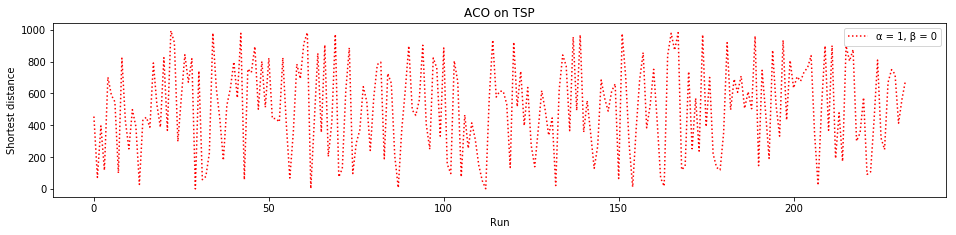

In [105]:
# Example with three random 1D arrays. 
# Each index 1 - 150 stands for one run. 
# The entry at the given position is the shortest distance measured in this run.

shortest_distance_per_run_1 = np.random.randint(1000, size=(233))
print(shortest_distance_per_run_1)
shortest_distance_per_run_2 = np.random.randint(1000, size=(1,150))
shortest_distance_per_run_3 = np.random.randint(1000, size=(1,150))

# calling simple_plot function with the three random arrays
simple_plot(shortest_distance_per_run_1, shortest_distance_per_run_2)

[28234 27344 28394 28884 28872 28394 29452 28804 26526 27708 27776 28658
 28892 29468 27926 29950 27418 27768 28930 28776 27968 29838 28944 28004
 29510 29518 28300 28768 28272 29814 29670 29312 27778 29994 28332 27314
 28024 29490 28256 28642 28868 28608 29326 28788 28366 28830 28992 26726
 28336 29638 27876 26626 28358 28572 28956 29176 28736 28910 29058 28468
 29572 27914 28726 27982 29110 29488 28412 28434 27636 27914 29530 28648
 27936 27118 28232 27840 28002 29098 29528 27446 29572 27966 28726 28492
 28708 29062 30150 28026 27898 29096 27266 27112 28044 27760 28144 28468
 28764 27118 27838 28840 28180 27918 28380 28476 28230 30378 29550 28928
 28736 27976 27732 27996 28618 29500 27914 29408 29034 29616 29586 27358
 28198 29618 29224 28018 28828 26324 28054 28464 27790 29074 27624 27862
 28280 29078 27684 29318 28348 27574 28620 28892 27368 28550 29318 27816
 28588 28456 28862 29752 27954 28968 28774 27590 28052 28676 28444 27634
 28898 29794 28744 28100 28060 27902 27906 28680 28

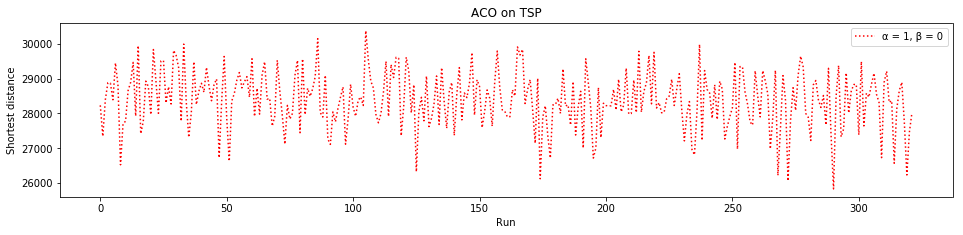

In [106]:
shortest_distance_per_run_1= np.array(best_solution_list)
print(shortest_distance_per_run_1)
simple_plot(shortest_distance_per_run_1)